In [54]:
import pandas as pd
import numpy as np
import json


In [2]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews


# A function that extracts which words exist in a text based on a list of words to which we compare.
def word_feats(words):
        return dict([(word, True) for word in words])

In [34]:
votes= pd.read_csv('usa-2016-presidential-election-by-county.csv', error_bad_lines=False, sep=";")

In [5]:
votes.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nebraska,NE,31145,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,...,5044.0,4936.0,93.0,93.0,0.018841,0.018438,0.803428,0.754393,0.196572,0.245607
2,California,CA,6015,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,...,9531.0,8770.0,241.0,365.0,0.041619,0.025286,0.548959,0.534661,0.451041,0.465339
3,Florida,FL,12031,"Duval County, Florida",199.0,428734.0,202618.0,196737.0,210537.0,211615.0,...,415761.0,411848.0,2606.0,3496.0,0.008489,0.006268,0.518217,0.509584,0.481783,0.490416
4,Kansas,KS,20053,"Ellsworth County, Kansas",25.0,2626.0,851.0,702.0,2021.0,1930.0,...,2938.0,2712.0,66.0,80.0,0.029499,0.022464,0.733283,0.703691,0.266717,0.296309


In [35]:
votes_state= votes.groupby(by=['State'], as_index=False)[["Votes", "Votes16 Trumpd", "Votes16 Clintonh"]].sum()

In [9]:
#votes["State"]

0               Alaska
1             Nebraska
2           California
3              Florida
4               Kansas
             ...      
3138         Tennessee
3139          Michigan
3140     West Virginia
3141    North Carolina
3142          Maryland
Name: State, Length: 3143, dtype: object

In [36]:
votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh
0,Alabama,2078165.0,1306925.0,718084.0
1,Alaska,0.0,0.0,0.0
2,Arizona,2062810.0,1021154.0,936250.0
3,Arkansas,1121684.0,677904.0,378729.0
4,California,11954317.0,3916209.0,7362490.0
5,Colorado,2564185.0,1137455.0,1212209.0
6,Connecticut,1623542.0,668266.0,884432.0
7,Delaware,441535.0,185103.0,235581.0
8,District of Columbia,280272.0,11553.0,260223.0
9,Florida,9386750.0,4605515.0,4485745.0


In [37]:
votes_state["Trump %"]= (votes_state["Votes16 Trumpd"]/votes_state["Votes"])*100

In [39]:
votes_state["Clinton %"]= (votes_state["Votes16 Clintonh"]/votes_state["Votes"])*100

In [70]:
#votes_state.drop([1])
#votes_state=votes_state.reset_index()


In [40]:
votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %
0,Alabama,2078165.0,1306925.0,718084.0,62.888414,34.553753
1,Alaska,0.0,0.0,0.0,NaN,NaN
2,Arizona,2062810.0,1021154.0,936250.0,49.503057,45.387118
3,Arkansas,1121684.0,677904.0,378729.0,60.436273,33.764322
4,California,11954317.0,3916209.0,7362490.0,32.759789,61.588546
5,Colorado,2564185.0,1137455.0,1212209.0,44.359319,47.274631
6,Connecticut,1623542.0,668266.0,884432.0,41.160992,54.475462
7,Delaware,441535.0,185103.0,235581.0,41.922611,53.355000
8,District of Columbia,280272.0,11553.0,260223.0,4.122067,92.846592
9,Florida,9386750.0,4605515.0,4485745.0,49.064000,47.788052


In [20]:
votes_state["T or H"]=
for i in votes_state:
    if votes_state["Trump %"] > votes_state["Clinton %"]:
        votes_state["T or H"] =="T"
    else:
        votes_state["T or H"] =="H"
        

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [41]:
votes_state['T or H'] = np.where(votes_state["Trump %"] > votes_state["Clinton %"], "Trump", "Hillary")

In [42]:
votes_state= votes_state.drop([1])

In [45]:
votes_state=votes_state.reset_index()

In [43]:
votes_state.to_csv('US_2016_winners.csv', index=False)

In [14]:
tweets_sentiment= pd.read_csv("tweets_sentiments_polarity_subjectivity.csv")

In [16]:
tweets_sentiment.head()

,Unnamed: 0,text,timestamp,user.name,user.screen_name,user.followers_count,state,hashtags,mentions,polarity,subjectivity
0,0,all in collusion together nojustice trumppence,2016-08-12 10:04:02.194,Red Octopus,redoctapus,531,LA,"['NOJUSTICE', 'TrumpPence']","['BarackObama', 'FBI', 'LorettaLynch', 'realDo...",0.000000,0.000000
1,1,cnn newday clear trump deliberately throwing ...,2016-08-12 10:04:30.035,Beverly Spence,bspence5,2652,MD,"['CNN', 'newday', 'Trump', 'ISIS']",[],0.100000,0.383333
2,2,kid you know suing someone thats the most bea...,2016-08-12 10:04:48.229,Rafael Alejandro,GinebraFilms,159,NJ,[],"['funnyordie', 'realDonaldTrump']",0.337500,0.425000
3,3,i totally concur this election is just cra cr...,2016-08-12 10:04:53.571,Kim Wasson,kimseacret3,244,MD,[],"['mike4193496', 'realDonaldTrump']",0.000000,0.408333
4,4,you are the co founder of isis you crooked ev...,2016-08-12 10:04:48.695,tom b,VNDISABLEDVET,68,TX,[],['HillaryClinton'],-0.287879,0.533333


In [17]:
tweets_states = tweets_sentiment.groupby(by=['state'], as_index=False)[['polarity']].mean()

In [27]:
statenames_list=["Alabama","Arkansas","Arizona","California","Colorado","Connecticut","District of Columbia","Delaware","Florida","Georgia","Hawaii","Iowa","Idaho","Illinois","Indiana","Kansas","Kentucky","Louisiana","Massachusetts","Maryland","Maine","Michigan","Minnesota","Missouri","Mississippi","Montana","North Carolina","North Dakota","Nebraska","New Hampshire","New Jersey","New Mexico","Nevada","New York","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Virginia","Vermont","Washington","Wisconsin","West Virginia","Wyoming"]


In [28]:
tweets_states["state_name"]=statenames_list

In [29]:
tweets_states

,state,polarity,state_name
1,AL,0.042941,Alabama
2,AR,0.040178,Arkansas
3,AZ,0.040153,Arizona
4,CA,0.028146,California
5,CO,0.017718,Colorado
6,CT,0.030055,Connecticut
7,DC,0.057254,District of Columbia
8,DE,0.024187,Delaware
9,FL,0.040260,Florida
10,GA,0.042274,Georgia


In [48]:
tweets_states=tweets_states.sort_values(by=['state_name'])
tweets_states=tweets_states.reset_index()

In [49]:
votes_state["polarity"]=tweets_states["polarity"]

In [50]:
#votes_state=votes_state.drop(votes_state.columns[[0,1]], axis = 1)
votes_state

,index,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %,T or H,polarity
0,0,Alabama,2078165.0,1306925.0,718084.0,62.888414,34.553753,Trump,0.042941
1,2,Arizona,2062810.0,1021154.0,936250.0,49.503057,45.387118,Trump,0.040153
2,3,Arkansas,1121684.0,677904.0,378729.0,60.436273,33.764322,Trump,0.040178
3,4,California,11954317.0,3916209.0,7362490.0,32.759789,61.588546,Hillary,0.028146
4,5,Colorado,2564185.0,1137455.0,1212209.0,44.359319,47.274631,Hillary,0.017718
5,6,Connecticut,1623542.0,668266.0,884432.0,41.160992,54.475462,Hillary,0.030055
6,7,Delaware,441535.0,185103.0,235581.0,41.922611,53.355000,Hillary,0.024187
7,8,District of Columbia,280272.0,11553.0,260223.0,4.122067,92.846592,Hillary,0.057254
8,9,Florida,9386750.0,4605515.0,4485745.0,49.064000,47.788052,Trump,0.040260
9,10,Georgia,4029564.0,2068623.0,1837300.0,51.336150,45.595504,Trump,0.042274


In [52]:
votes_state=votes_state.sort_values(by=['polarity'])
votes_state=votes_state.drop(columns=['index'])
votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %,T or H,polarity
23,Mississippi,1162987.0,678457.0,462001.0,58.337453,39.725380,Trump,0.000789
43,Utah,984957.0,452086.0,274188.0,45.899060,27.837560,Trump,0.008402
4,Colorado,2564185.0,1137455.0,1212209.0,44.359319,47.274631,Hillary,0.017718
40,South Dakota,367151.0,227460.0,114938.0,61.952712,31.305376,Trump,0.021933
36,Oregon,1808575.0,742506.0,934631.0,41.054753,51.677757,Hillary,0.022093
33,North Dakota,336968.0,216133.0,93526.0,64.140512,27.755158,Trump,0.023062
6,Delaware,441535.0,185103.0,235581.0,41.922611,53.355000,Hillary,0.024187
3,California,11954317.0,3916209.0,7362490.0,32.759789,61.588546,Hillary,0.028146
29,New Jersey,3674893.0,1535513.0,2021756.0,41.783883,55.015371,Hillary,0.028373
38,Rhode Island,450787.0,179421.0,249902.0,39.801725,55.436825,Hillary,0.028467


In [ ]:
chopped = votes_state[["State","polarity"]]
alaska={"State": "Alaska", "polarity": 0.000000}
chopped = chopped.append(alaska, ignore_index=True)
chopped

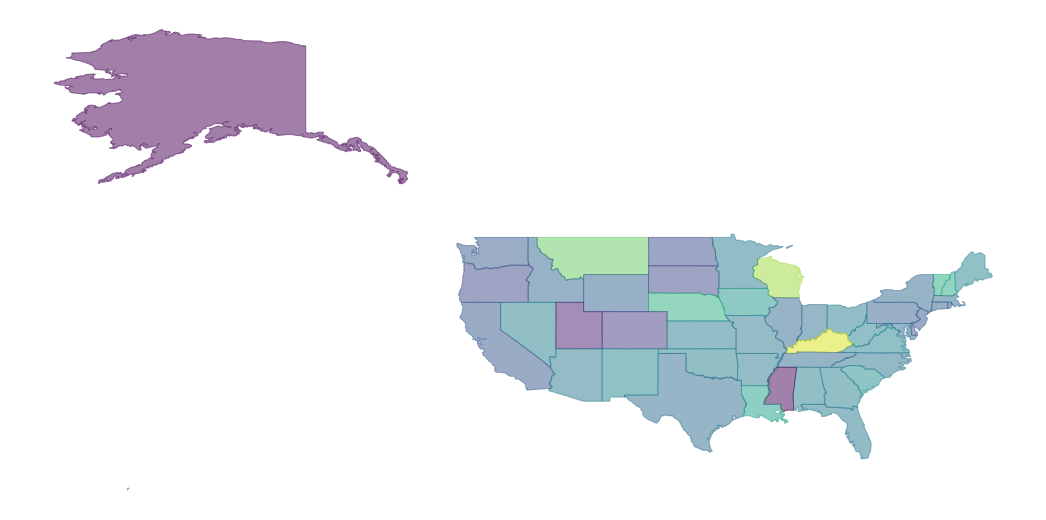

In [123]:
#State population by colour
import os
import json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon




S_DIR = r"C:\Users\i518410\OneDrive - SAP SE\Documents\UvA DATA SCIENCE\Fundamentals of Data Science\Scripts and Datasets\States"

BLUE = '#5599ff'

with open(os.path.join(S_DIR, 'states.json')) as rf:    
    data = json.load(rf)
#data=r"C:\Users\i518410\OneDrive - SAP SE\Documents\UvA DATA SCIENCE\Fundamentals of Data Science\Scripts and Datasets\states.json"

fig = plt.figure() 
ax = fig.gca()
fig.set_size_inches(18.5, 10.5)
for feature in data['features']:
    geometry = feature['geometry']
    NAME = feature['properties']['STATE_NAME']
    POP=chopped.loc[chopped['State'] == NAME, 'polarity'].iloc[0]
    cmap = plt.cm.viridis
    norm = matplotlib.colors.Normalize(vmin=0.0, vmax=0.1)
    col = cmap(norm(POP))
    #print(NAME,POP,col)
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=col, ec=col,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=col, ec=col, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

In [113]:
#POP = chopped.loc[chopped['State'] == NAME, 'polarity'].iloc[0]


In [120]:
#alaska={"State": "Alaska", "polarity": 0.000000}
#chopped = chopped.append(alaska, ignore_index=True)
#chopped

,State,polarity
0,Mississippi,0.000789
1,Utah,0.008402
2,Colorado,0.017718
3,South Dakota,0.021933
4,Oregon,0.022093
5,North Dakota,0.023062
6,Delaware,0.024187
7,California,0.028146
8,New Jersey,0.028373
9,Rhode Island,0.028467
